In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
# Load the dataset
df = pd.read_csv("C:/Users/harsh/Downloads/heart.csv")  # Ensure your file name matches this

# Preview the dataset
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
print(df.info())
print("\nMissing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target     

In [5]:
# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9853658536585366


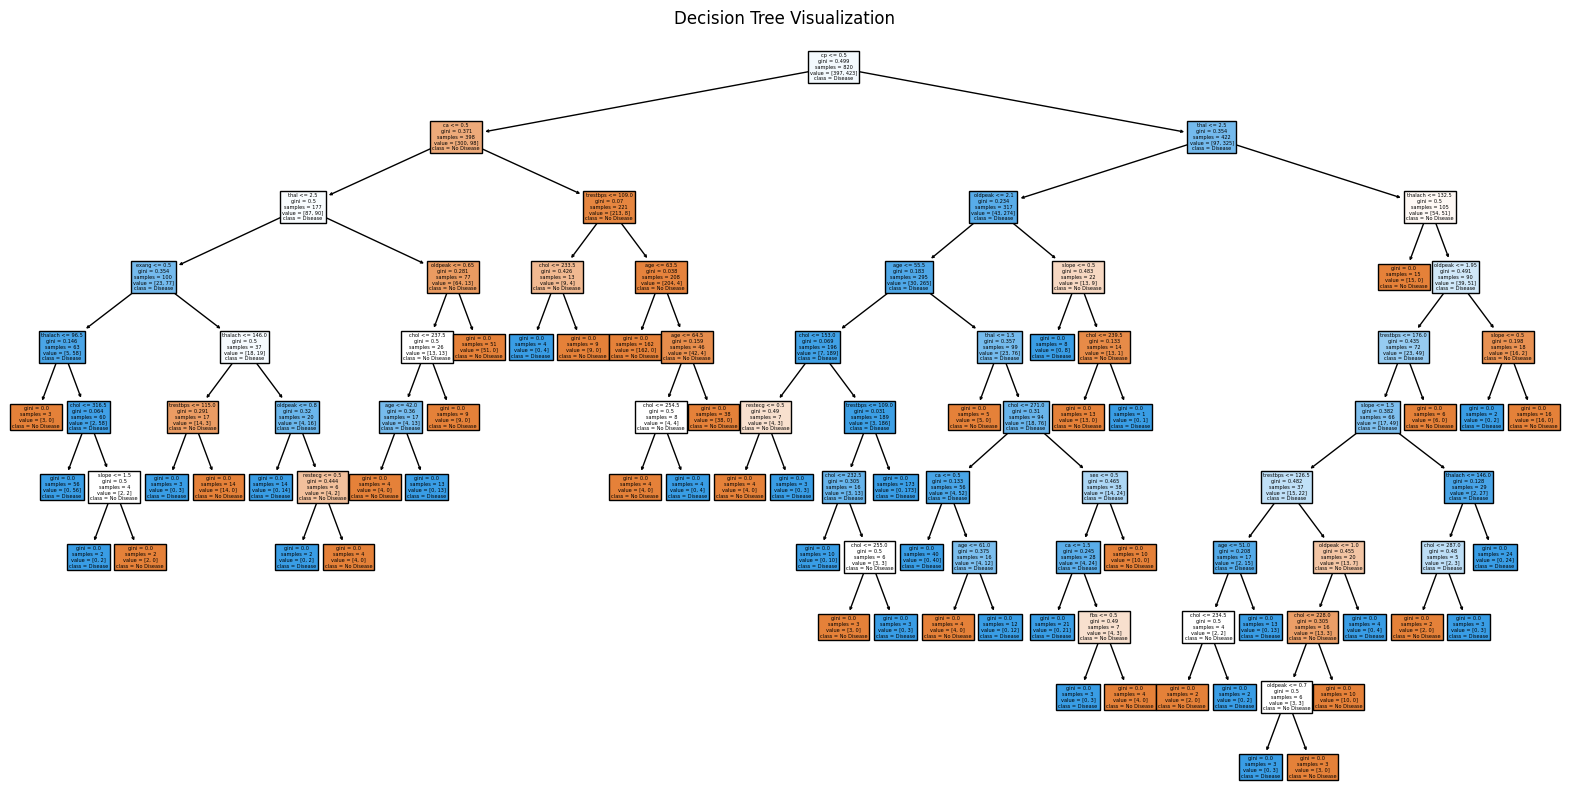

In [8]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, 
          filled=True, 
          feature_names=X.columns.tolist(),  # 👈 Fix here
          class_names=['No Disease', 'Disease'])
plt.title("Decision Tree Visualization")
plt.show()


In [9]:
# Limiting max depth
dt_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_pruned.fit(X_train, y_train)

# Evaluate pruned tree
y_pred_pruned = dt_pruned.predict(X_test)
print("Pruned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))


Pruned Decision Tree Accuracy: 0.7804878048780488


In [10]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366


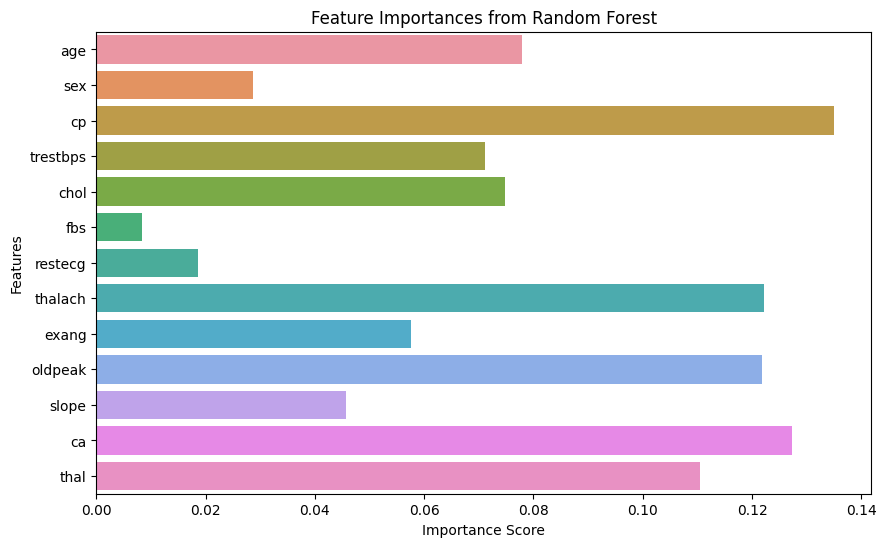

In [11]:
importances = rf_model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [12]:
# 5-fold cross-validation for Random Forest
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Random Forest CV Accuracy Scores:", cv_scores)
print("Average CV Accuracy:", np.mean(cv_scores))


Random Forest CV Accuracy Scores: [1.         1.         1.         1.         0.98536585]
Average CV Accuracy: 0.9970731707317073
